In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load datasets
train = pd.read_csv('train_downsampled_10k.csv')

Since the original challenge required that we use data from 2013 and 2014 to predict users’ preferred hotel clusters in 2015, we further split our new set of 10,000 users into training and testing sets by year; 2013 and part of 2014 for the new training set and the rest of 2014 for the testing set. For a 80/20 split, we will split our data set so that anything after July 2014 is in test_new and anything before is in train_new.


In [3]:
train_new = train[((train.year == 2013) | ((train.year == 2014) & (train.month < 8)))]
test_new = train[((train.year == 2014) & (train.month >= 8))]

The test set should only contain booking events. When is_booking is 0, it means that instance was a click and didn't end in a booking. So we'll need our test set to only include bookings

In [4]:
test_new = test_new[test_new.is_booking == 1]

In [5]:
print(train_new.shape)
print(test_new.shape)

(182551, 28)
(6811, 28)


## Baseline model

The most simple method that we could try (beyond just randomly selecting clusters for each user) was to always select the most common clusters among the training set.

In [6]:
top_five_clusters = list(train.hotel_cluster.value_counts().head().index)
print(top_five_clusters)

[91, 48, 41, 64, 65]


We can use the most common clusters as our first list of predictions for each row in the test subset.

In [7]:
preds = [top_five_clusters for i in range(test_new.shape[0])]

In [8]:
import ml_metrics as metrics
target_preds = [[i] for i in test_new['hotel_cluster']]

The above code gave us a list of the 5 most common clusters and the MAP@5 score for this method was .0504. This provides a baseline value for which to evaluate the other models.

In [9]:
#load datasets
train_11k = pd.read_csv('train_downsampled_11k.csv')
train_12k = pd.read_csv('train_downsampled_12k.csv')
train_13k = pd.read_csv('train_downsampled_13k.csv')
train_14k = pd.read_csv('train_downsampled_14k.csv')
train_15k = pd.read_csv('train_downsampled_15k.csv')

In [10]:
#Split the data
train_new_11k = train_11k[((train_11k.year == 2013) | ((train_11k.year == 2014) & (train_11k.month < 8)))]
test_new_11k = train_11k[((train_11k.year == 2014) & (train_11k.month >= 8))]
train_new_12k = train_12k[((train_12k.year == 2013) | ((train_12k.year == 2014) & (train_12k.month < 8)))]
test_new_12k = train_12k[((train_12k.year == 2014) & (train_12k.month >= 8))]
train_new_13k = train_13k[((train_13k.year == 2013) | ((train_13k.year == 2014) & (train_13k.month < 8)))]
test_new_13k = train_13k[((train_13k.year == 2014) & (train_13k.month >= 8))]
train_new_14k = train_14k[((train_14k.year == 2013) | ((train_14k.year == 2014) & (train_14k.month < 8)))]
test_new_14k = train_14k[((train_14k.year == 2014) & (train_14k.month >= 8))]
train_new_15k = train_15k[((train_15k.year == 2013) | ((train_15k.year == 2014) & (train_15k.month < 8)))]
test_new_15k = train_15k[((train_11k.year == 2014) & (train_15k.month >= 8))]

In [11]:
test_new_11k = test_new_11k[test_new_11k.is_booking == 1]
test_new_12k = test_new_12k[test_new_12k.is_booking == 1]
test_new_13k = test_new_13k[test_new_13k.is_booking == 1]
test_new_14k = test_new_14k[test_new_14k.is_booking == 1]
test_new_15k = test_new_15k[test_new_15k.is_booking == 1]

In [12]:
print(train_new_11k.shape)
print(test_new_11k.shape)
print(train_new_12k.shape)
print(test_new_12k.shape)
print(train_new_13k.shape)
print(test_new_13k.shape)
print(train_new_14k.shape)
print(test_new_14k.shape)
print(train_new_15k.shape)
print(test_new_15k.shape)

(201514, 28)
(7706, 28)
(218144, 28)
(8283, 28)
(231302, 28)
(9136, 28)
(254745, 28)
(9761, 28)
(275787, 28)
(7659, 28)


In [13]:
preds_11k = [top_five_clusters for i in range(test_new_11k.shape[0])]
preds_12k = [top_five_clusters for i in range(test_new_12k.shape[0])]
preds_13k = [top_five_clusters for i in range(test_new_13k.shape[0])]
preds_14k = [top_five_clusters for i in range(test_new_14k.shape[0])]
preds_15k = [top_five_clusters for i in range(test_new_15k.shape[0])]

In [14]:
target_preds_11k = [[i] for i in test_new_11k['hotel_cluster']]
target_preds_12k = [[i] for i in test_new_12k['hotel_cluster']]
target_preds_13k = [[i] for i in test_new_13k['hotel_cluster']]
target_preds_14k = [[i] for i in test_new_14k['hotel_cluster']]
target_preds_15k = [[i] for i in test_new_15k['hotel_cluster']]

In [15]:
mapk_scores = [metrics.mapk(target_preds, preds, k=5), metrics.mapk(target_preds_11k, preds_11k, k=5), metrics.mapk(target_preds_12k, preds_12k, k=5), metrics.mapk(target_preds_13k, preds_13k, k=5), metrics.mapk(target_preds_14k, preds_14k, k=5), metrics.mapk(target_preds_15k, preds_15k, k=5)]

In [16]:
print(mapk_scores)

[0.06752067733568247, 0.06794921706029934, 0.07058432934926959, 0.06524190017513136, 0.06447939077280333, 0.06035383209296253]


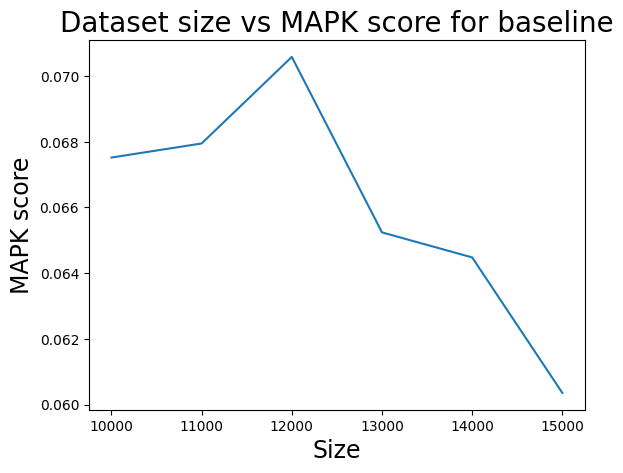

In [17]:
dataset_size = [10000, 11000, 12000, 13000, 14000, 15000]

plt.plot(dataset_size,mapk_scores)
plt.title("Dataset size vs MAPK score for baseline",fontsize=20)
plt.xlabel("Size",fontsize=17)
plt.ylabel("MAPK score",fontsize=17)
plt.show()